# **DESAFIO DA SEMANA 3​**

O arquivo [ListaAtividades.docx](https://ava.univesp.br/bbcswebdav/courses/COM200/COM200/Documentos/ListaAtividades.docx) contém um levantamento das atividades necessárias para realizar uma reforma de uma casa. Esse arquivo segue padrões e diretrizes do guia de gerenciamento de projetos do PMBOK, e pode ser abstraído e utilizado para qualquer tipo de projeto, incluindo projetos de software. Analise o arquivo e crie seu próprio documento para representar as atividades que deverão ser realizadas para desenvolver um software que permita o cadastro de usuários e tenha como função principal a validação do seu CPF, seguindo a seguinte regra de negócios:​

​

Sabe-se que o CPF é formado por 9 dígitos + 2 dígitos verificadores, então para calcular os dígitos verificadores devemos seguir os seguintes passos:​

1) Multiplicar os 9 primeiros dígitos pelo índice de sua posição.​

2) Somar os resultados e dividir por 11 e guardar o resto.​

Exemplo: 123.456.789-09​

1*1+2*2+3*3+4*4+5*5+6*6+7*7+8*8+9*9 = 285/11 = 25​

Resto = 10​

3) A unidade do resto deverá ser igual ao primeiro digito verificador.​

4) Repetir passo 1 com os 10 primeiros dígitos, só que agora começando a sequência de multiplicador em zero.​

Exemplo: 1*0+2*1+3*2+4*3+5*4+6*5+7*6+8*7+9*8+0*9= 240/11 = 21​

 Resto = 9​

5) Se o resto for igual ao segundo dígito verificador, e o resto da operação do passo 2 for igual ao primeiro digito verificador, o CPF é correto.​

## Proposta para o desenvolvimento do solicitado pelo cliente
A seguir se mostra o link que possui a lista de atividades para o desenvolvimento do projeto de verificação do CPF
https://alunounivespbr.sharepoint.com/:w:/r/sites/FacilitadoresTurma04FPC/Documentos%20Compartilhados/General/Live%201/ListaAtividades.docx?d=w631123f2285a4ba4b9885e8334e5d875&csf=1&web=1&e=0tiIhR

## Processo de desenvolvimento do projeto atraves de MVP para chegar ao produto final.
* Anastasiia Lastovetska. What are Key Minimum Viable Product Examples and How Can They Be Used?. https://mlsdev.com/blog/minimum-viable-product-examples.

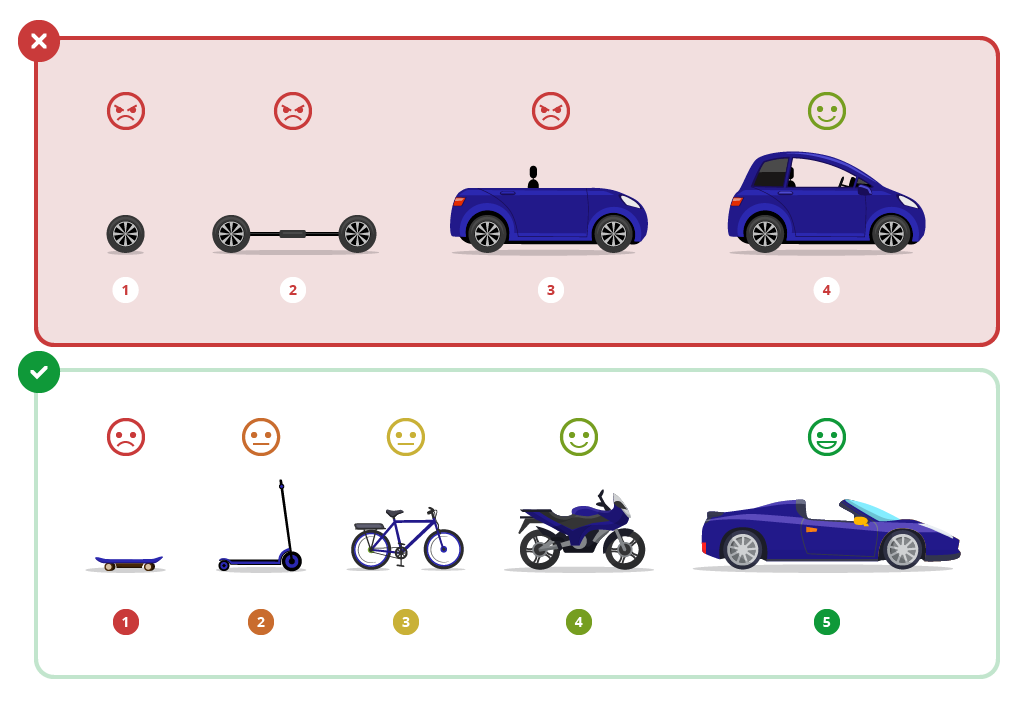

---
## **MVP 1 - Algoritmos de verificação**

#### **FUNÇÃO PARA VALIDAR O CPF**

In [60]:
def validar_cpf(cpf):
  """
  :param cpf: Valor do CPF, tipo de dado [str].

  :return: True ou False se o CPF for válido ou não,respectivamente. 
            Caso que acontecer um erro também é enviado uma mensagem. 

  """
  Resultado_Verificacao = ''
  if len(cpf)==11: # Verificar a extensão do CPF

    if cpf.isdigit(): # Verificar se só contém números
      dv_sum1 = 0
      dv_sum2 = 0
      dv1 = 0

      for idx in range(10):
          dv_sum1 += ((idx + 1) * int(cpf[idx]))
          dv_sum2 += (idx * int(cpf[idx]))
          if idx == 8:
              dv1 = dv_sum1 % 11

      dv2 = dv_sum2 % 11

      if dv1 == 10:
          dv1 = 0
      if dv2 == 10:
          dv2 = 0

      if dv1 == int(cpf[9]) and dv2 == int(cpf[10]):
          Resultado_Verificacao = 'Válido.'
      else:
          Resultado_Verificacao = 'Não Válido.'
    else:
      Resultado_Verificacao = 'Não Válido. O CPF só pode conter números.'

  else:
    Resultado_Verificacao = 'Não Válido. A extenção do CPF não é correta.'

  return Resultado_Verificacao

In [61]:
# Verificar Função
validar_cpf('1235678909')

'Não Válido. A extenção do CPF não é correta.'

---
## **MVP 2 – Plataforma para interação com o usuário**


In [63]:
#@title **UNIVESP - LIVE 2 FPC**
#@markdown ---
#@markdown ### **Sistema de verificação de CPF**
#@markdown #### **Disciplina: Formação Profissional em Computação**
#@markdown #### **Desafio da semana 3**
#@markdown Digite o seu Nome e CPF e clique no botão enviar para validar o seu CPF.

#@markdown ---

CPF = '12345678909' #@param {type:"string"}
Nome = 'Armando' #@param {type:"string"}
Sobrenome = "Gutierrez" #@param {type:"string"}
#@markdown ---
#@markdown #### **RESULTADO **
#@markdown Execute a célula para verificar o CPF:

resultado_validacao = validar_cpf(CPF)
      
print(f'O CPF do Aluno: {Nome} {Sobrenome} é {resultado_validacao}')


O CPF do Aluno: Armando Gutierrez é Válido.


---
## **MVP 3 – Plataforma para aplicação do algoritmo**
Criar um server flask para aplicação em back-end do algoritmo de verificação do CPF.

###### **Instalar Dependencias**
É preciso usar a biblioteca NGROK como elemento de tunelamento para acessar o server desde a Internet.

In [4]:
pip install flask-ngrok

###### **Criar o Server**
A partir de uma chamada com o método GET é possível acessar ao Server.

In [66]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
app = Flask(__name__)
run_with_ngrok(app)   

html_template = """
  <!doctype html>

  <html>
    <title>Sistema de verificação de CPF</title>
    <h1 style='color: red;' >UNIVESP - LIVE 2 FPC</h1>
    <h1>Sistema de verificação de CPF</h1>
    <h3>Disciplina: Formação Profissional em Computação</h3>
    <h3>Desafio da semana 3</h3>
    <body>
      <p>Digite o seu Nome e CPF e clique no botão enviar 
        para validar o seu CPF. </p>
    </body>


  <form action="/" method="get">
    <label for="Nome">Nome:</label>
    <input type="text" id="Nome" name="Nome"><br><br>
    <label for="Sobrenome">Sobrenome:</label>
    <input type="text" id="Sobrenome" name="Sobrenome"><br><br>
    <label for="CPF">CPF:</label>
    <input type="text" id="CPF" name="CPF"><br><br>
    <button type="submit">Enviar</button>
  </form>

  """

html_resultado = """
  <!doctype html>
  <html>    
  <form action="/" method="get">
    <button type="submit">Atrás</button>
  </form>

  """

def criar_interfaz_web():
  pass

  # <div>
  #   <t3>%s</t3>
  # </div>
  #.format(resultado_in)
  #return html_template



@app.route("/")
def home():  
  print('Acesso ao Server... Ok')
  Resultado = ''
  try:
    print(request.method)
    
    if request.method == 'GET': #/?CPF=71475708122&Nome=Armando&Sobrenome=Gutierrez
      print(list(request.args.keys()))
      variaveis_get = list(request.args.keys())
      if len(variaveis_get) > 0:
        if 'CPF' in variaveis_get and 'Nome' in variaveis_get and 'Sobrenome' in variaveis_get:

          CPF=request.args.get("CPF", "")
          Nome=request.args.get("Nome", "")
          Sobrenome=request.args.get("Sobrenome", "")

          Estado_Verificacao = validar_cpf(CPF)

          Resultado = f'O CPF do Aluno: {Nome} {Sobrenome} é {Estado_Verificacao}'
        
  except Exception as e:
    Resultado = 'Erro no Server. ' + str(e)
    pass

  print('O Resultado é:', Resultado) 

  if Resultado == '':
    criar_interfaz_web.__doc__ = "%s </html>" % (html_template)
    return criar_interfaz_web.__doc__
  else:
    return str(str(Resultado) + str(html_resultado) + '</html>')
  
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://33702bbc2b5f.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [18/Mar/2021 15:56:04] "GET / HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
[]
O Resultado é: 


127.0.0.1 - - [18/Mar/2021 15:56:05] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Mar/2021 15:56:16] "GET / HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
[]
O Resultado é: 


127.0.0.1 - - [18/Mar/2021 15:56:26] "GET / HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
[]
O Resultado é: 


127.0.0.1 - - [18/Mar/2021 15:56:28] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Mar/2021 15:56:46] "GET /?Nome=qweqw&Sobrenome=asd&CPF=12345678909 HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
['Nome', 'Sobrenome', 'CPF']
O Resultado é: O CPF do Aluno: qweqw asd é Válido.


127.0.0.1 - - [18/Mar/2021 15:56:53] "GET / HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
[]
O Resultado é: 


127.0.0.1 - - [18/Mar/2021 15:57:16] "GET /?Nome=Armando+Manuel+&Sobrenome=Gutiérrez+Menéndez&CPF=123456789yu HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
['Nome', 'Sobrenome', 'CPF']
O Resultado é: O CPF do Aluno: Armando Manuel  Gutiérrez Menéndez é Não Válido. O CPF só pode conter números.


127.0.0.1 - - [18/Mar/2021 15:57:23] "GET /?Nome=Armando+Manuel+&Sobrenome=Gutiérrez+Menéndez&CPF=123456789yu HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
['Nome', 'Sobrenome', 'CPF']
O Resultado é: O CPF do Aluno: Armando Manuel  Gutiérrez Menéndez é Não Válido. O CPF só pode conter números.


127.0.0.1 - - [18/Mar/2021 15:57:32] "GET /?Nome=Armando+Manuel+&Sobrenome=Gutiérrez+Menéndez&CPF=12345678909 HTTP/1.1" 200 -


Acesso ao Server... Ok
GET
['Nome', 'Sobrenome', 'CPF']
O Resultado é: O CPF do Aluno: Armando Manuel  Gutiérrez Menéndez é Válido.
